# **Google Play Store Apps Analysis**

## **Overview of Data**

### Importing all neccessary libararies

In [412]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Getting header rows

In [413]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### Renaming unnamed column

In [414]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

### Again getting header rows

In [415]:
df.head()

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### Getting knowledge of null values

In [416]:
df.isnull().sum()

id                   0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Getting knowledge of shape of dataset

In [417]:
df.shape

(10841, 14)

## **2. Market Opportunity:**

### Which categories have the highest average number of installs and ratings? Are there any underserved categories with high potential for growth?

In [418]:
df = df[df['Rating'] != 19]

In [419]:
top_ratings = df.groupby('Category')['Rating'].mean().round(2).sort_values(ascending=False).head(20)

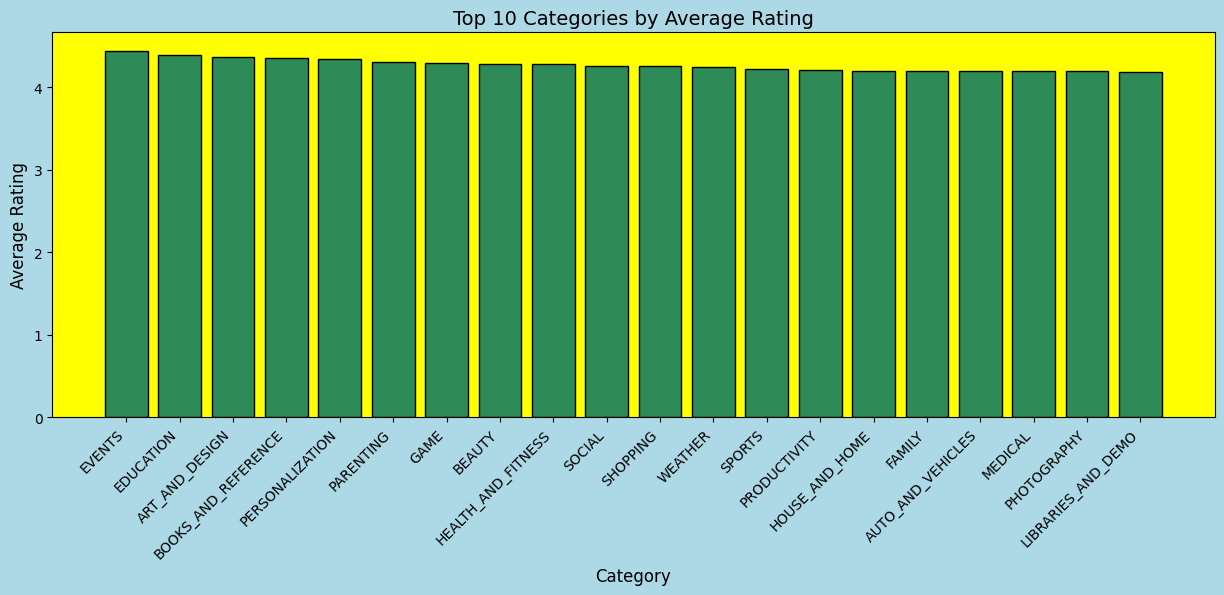

In [420]:
plt.figure(figsize=(15,5))
plt.bar(top_ratings.index, top_ratings.values, color='seagreen', edgecolor='black')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 10 Categories by Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('yellow')
plt.show()

In [421]:
df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).astype(int)

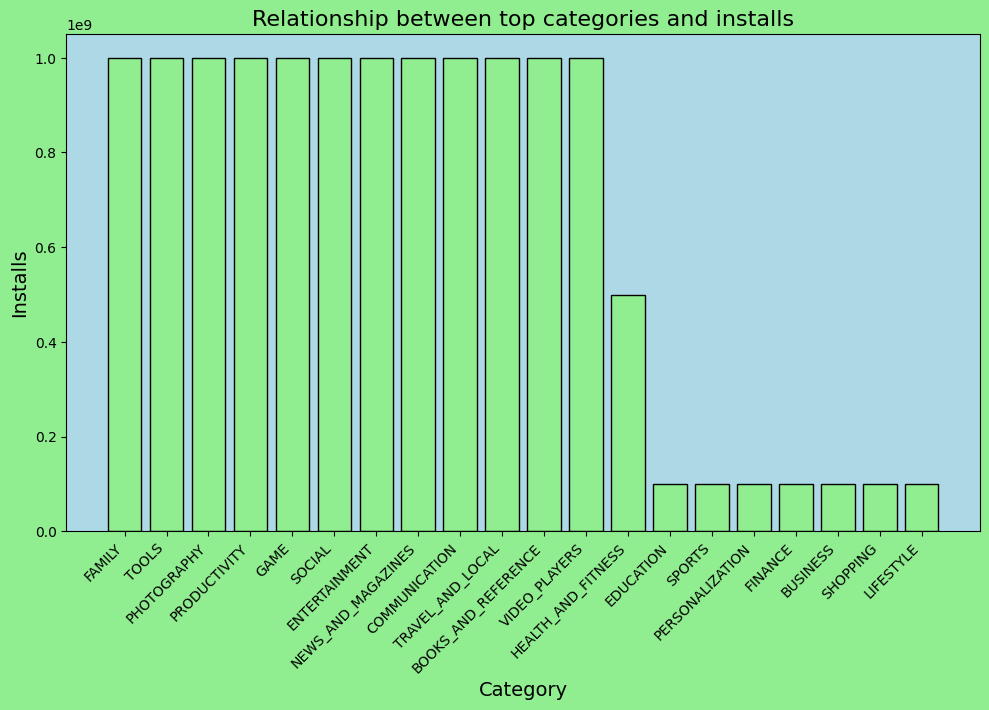

In [543]:
top_installs = df.groupby('Category')['Installs'].max().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.bar(top_installs.index, top_installs.values, color='lightgreen', edgecolor='black')
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Installs', fontsize = 14)
plt.title('Relationship between top categories and installs', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightgreen')
ax.set_facecolor('lightblue')
plt.show()

## **3. Monetization Potential:**

### Can we identify categories where users are more willing to pay for apps? What pricing strategies are effective in these categories?

In [423]:
df[df['Type'] != 'Free']

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
290,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
291,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,$0.99,Mature 17+,Entertainment,25-Nov-15,1.2,2.1 and up
10760,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,$7.99,Everyone,Health & Fitness,8-Aug-18,1.9.3,4.2 and up
10782,10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,$16.99,Teen,Action,27-Feb-15,2.22,5.0 and up
10785,10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000,Paid,$1.20,Everyone,Puzzle,5-Jun-18,2.7,2.3 and up


In [424]:
df['Price'] = df['Price'].str.replace('[$]', '', regex=True).astype(float)

## **4. Top Selling Categories**

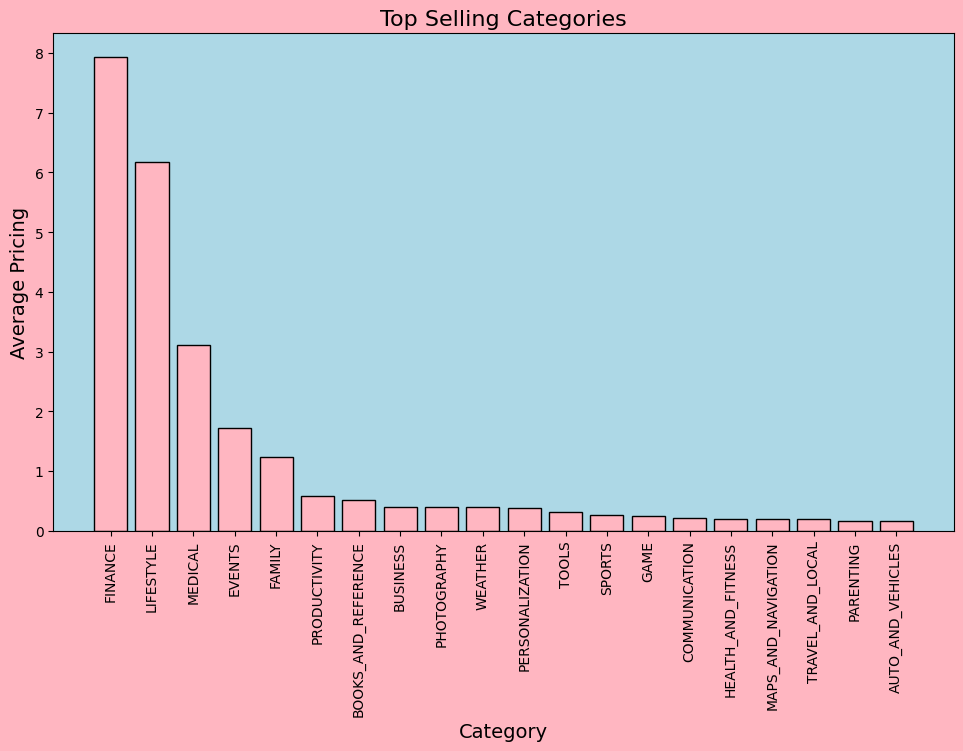

In [544]:
top_selling = df.groupby('Category')['Price'].mean().sort_values(ascending=False).round(2).head(20)

plt.figure(figsize=(10,6))
plt.bar(top_selling.index, top_selling.values, color='lightpink', edgecolor='black')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Pricing',fontsize=14)
plt.title('Top Selling Categories', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=90)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightpink')
ax.set_facecolor('lightblue')
plt.show()

## **5. Top Selling Apps**

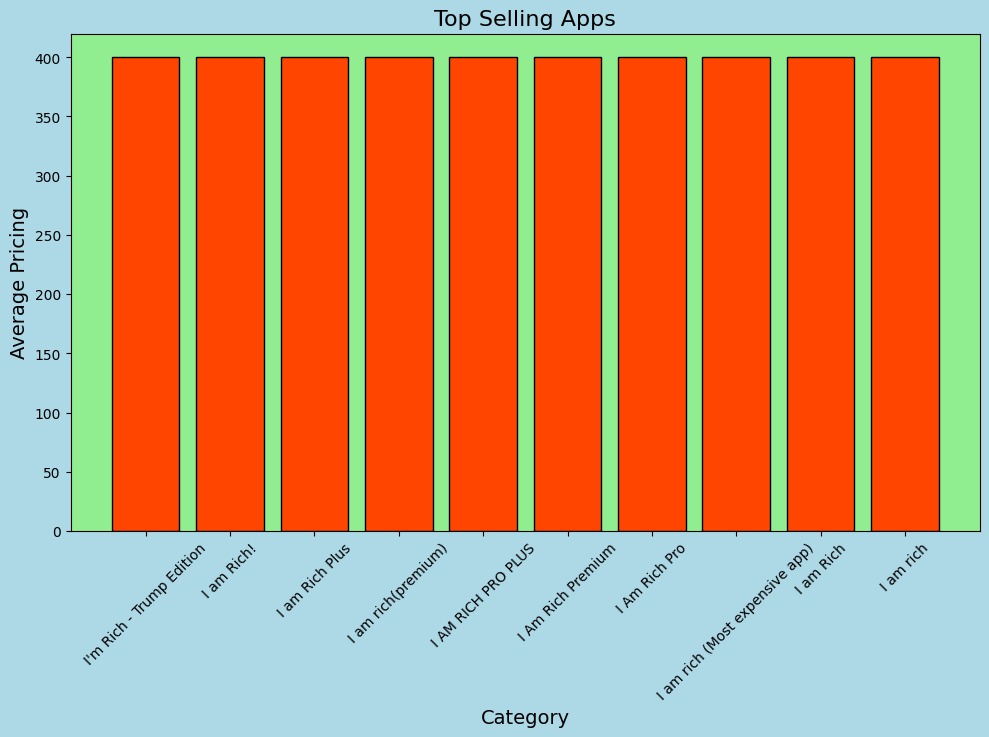

In [545]:
top_selling_apps = df.groupby('App')['Price'].mean().sort_values(ascending=False).round(2).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_selling_apps.index, top_selling_apps.values, color='orangered', edgecolor='black')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Pricing', fontsize=14)
plt.title('Top Selling Apps', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightgreen')
plt.show()

## **6. Most Successful Categories and Apps interms of reviews, ratings, number of installs**

In [427]:
df['Rating'] = df['Rating'].fillna(value=df['Rating'].mean())

In [428]:
df.isnull().sum()

id                0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [429]:
df['Reviews'] = df['Reviews'].astype(int)
df['Rating'] = df['Rating'].astype(int)
df['Installs'] = df['Installs'].astype(int)

In [517]:
df[(df['Reviews'] > df['Reviews'].quantile(0.999)) & 
                        (df['Rating'] > df['Rating'].quantile(0.184)) & 
                        (df['Installs'] > df['Installs'].quantile(0.994))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
381,381,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
382,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
2544,2544,Facebook,SOCIAL,4,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2545,2545,Instagram,SOCIAL,4,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2604,2604,Instagram,SOCIAL,4,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2611,2611,Instagram,SOCIAL,4,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3904,3904,WhatsApp Messenger,COMMUNICATION,4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3909,3909,Instagram,SOCIAL,4,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3943,3943,Facebook,SOCIAL,4,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device


## **7. Top 10 demanding genres**

In [533]:
top_genre = df.groupby('Genres')['Installs'].mean().sort_values(ascending=False).round(2).head(10)

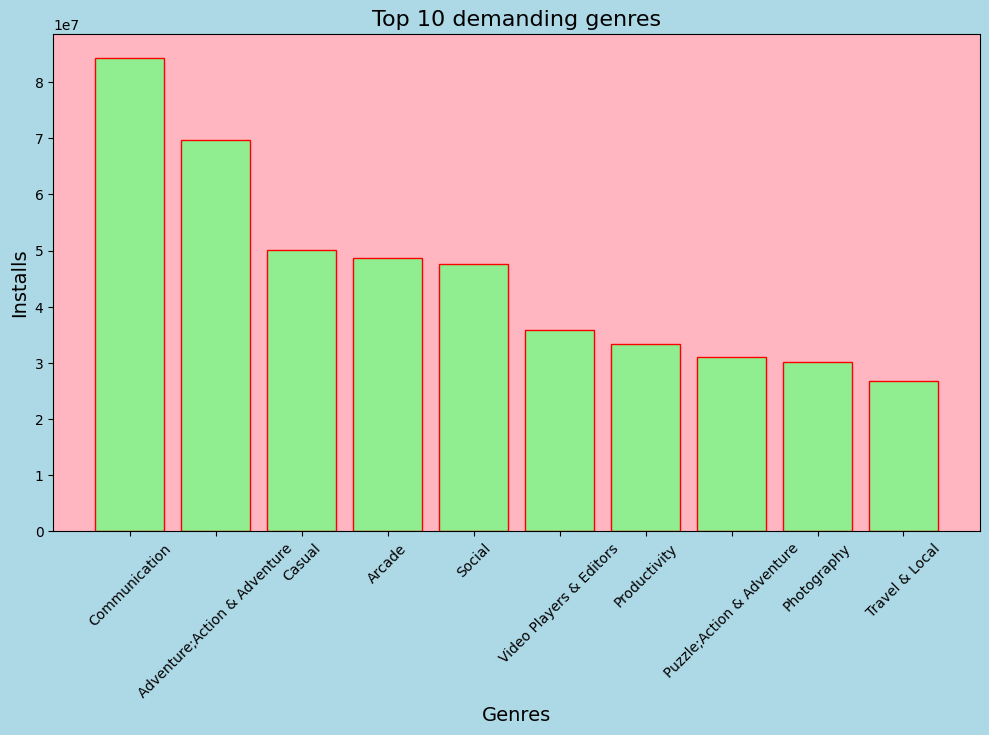

In [540]:
plt.figure(figsize=(10,6))
plt.title('Top 10 demanding genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Installs', fontsize=14)
plt.bar(top_genre.index, top_genre.values, color='lightgreen', edgecolor='red')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor('lightblue')
plt.gca().set_facecolor('lightpink')
plt.show()

## **8. Top Paid Apps**

In [574]:
df[(df['Type'] != 'Free') &             
                        (df['Reviews'] > df['Reviews'].quantile(0.18)) & 
                        (df['Rating'] > df['Rating'].quantile(0.18)) & 
                        (df['Installs'] > df['Installs'].quantile(0.80))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,2241,Minecraft,FAMILY,4,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device
4034,4034,Hitman Sniper,GAME,4,408292,29M,10000000,Paid,0.99,Mature 17+,Action,12-Jul-18,1.7.110758,4.1 and up
4347,4347,Minecraft,FAMILY,4,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device


## **9. Top Free Apps**

In [634]:
df[(df['Type'] == 'Free') &             
                        (df['Reviews'] > df['Reviews'].quantile(0.999)) & 
                        (df['Rating'] > df['Rating'].quantile(0.18)) & 
                        (df['Installs'] > df['Installs'].quantile(0.994))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
381,381,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
382,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
2544,2544,Facebook,SOCIAL,4,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2545,2545,Instagram,SOCIAL,4,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2604,2604,Instagram,SOCIAL,4,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2611,2611,Instagram,SOCIAL,4,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3904,3904,WhatsApp Messenger,COMMUNICATION,4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3909,3909,Instagram,SOCIAL,4,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3943,3943,Facebook,SOCIAL,4,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device


## **10. Top Categories in Content Rating**

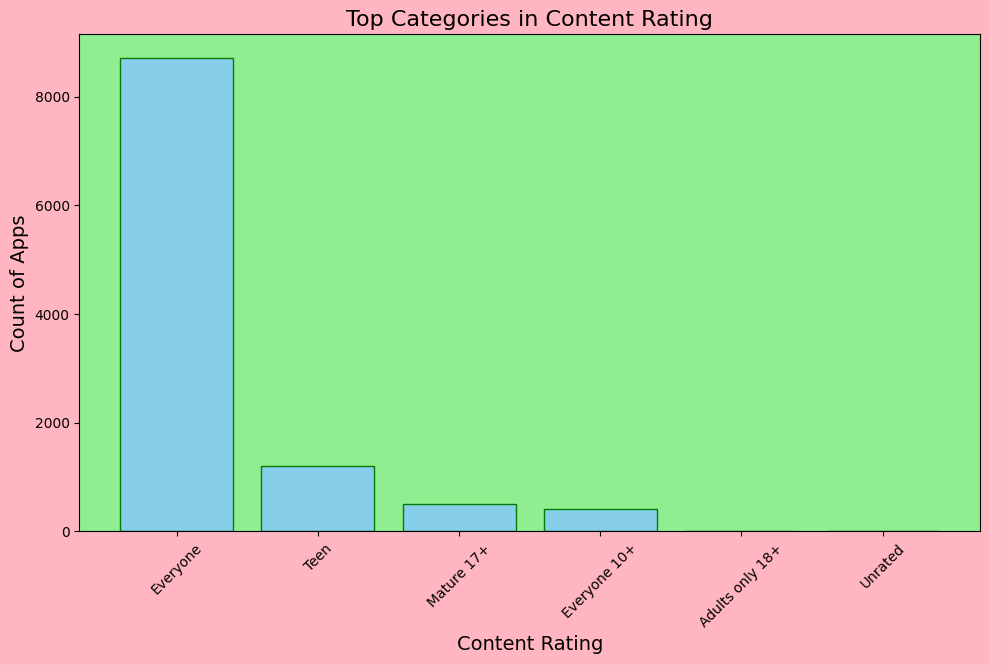

In [649]:
top_cat = df.groupby('Content Rating')['App'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(top_cat.index, top_cat.values, color='skyblue', edgecolor='green')
plt.title('Top Categories in Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Count of Apps', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().patch.set_facecolor('lightgreen')
plt.gcf().set_facecolor('lightpink')
plt.show()